In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/yerra/Downloads/Airbnb_data - airbnb_data.csv")
pd.set_option('display.max_columns', None)
df.head(20)

id  log_price property_type        room_type  \
0    6901257   5.010635     Apartment  Entire home/apt   
1    6304928   5.129899     Apartment  Entire home/apt   
2    7919400   4.976734     Apartment  Entire home/apt   
3   13418779   6.620073         House  Entire home/apt   
4    3808709   4.744932     Apartment  Entire home/apt   
5   12422935   4.442651     Apartment     Private room   
6   11825529   4.418841     Apartment  Entire home/apt   
7   13971273   4.787492   Condominium  Entire home/apt   
8     180792   4.787492         House     Private room   
9    5385260   3.583519         House     Private room   
10   5578513   4.605170     Apartment     Private room   
11  17423675   5.010635         House  Entire home/apt   
12  14066228   4.248495     Apartment     Private room   
13   2658946   5.298317     Apartment  Entire home/apt   
14    583490   4.955827     Apartment  Entire home/apt   
15   6226658   4.094345     Apartment     Private room   
16   7499179   4.317488          Loft     Private room   
17  14648556   4.595120     Townhouse     Private room   
18  17589436   4.882802     Apartment  Entire home/apt   
19  18224863   4.595120         House  Entire home/apt   

                                            amenities  accommodates  \
0   {"Wireless Internet","Air conditioning",Kitche...             3   
1   {"Wireless Internet","Air conditioning",Kitche...             7   
2   {TV,"Cable TV","Wireless Internet","Air condit...             5   
3   {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4   {TV,Internet,"Wireless Internet","Air conditio...             2   
5   {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
6   {TV,Internet,"Wireless Internet","Air conditio...             3   
7   {TV,"Cable TV","Wireless Internet","Wheelchair...             2   
8   {TV,"Cable TV","Wireless Internet","Pets live ...             2   
9   {"Wireless Internet","Air conditioning",Kitche...             2   
10  {Internet,"Wireless Internet","Air conditionin...             2   
11  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
12  {TV,Internet,"Wireless Internet",Kitchen,"Free...             2   
13  {TV,"Cable TV",Internet,"Wireless Internet","A...             6   
14  {Kitchen,Heating,"Smoke detector","Carbon mono...             2   
15  {Internet,"Wireless Internet","Air conditionin...             2   
16  {TV,"Wireless Internet",Kitchen,"Pets allowed"...             2   
17  {Internet,"Wireless Internet","Air conditionin...             2   
18  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19  {TV,"Wireless Internet","Air conditioning",Kit...             8   

    bathrooms  bed_type cancellation_policy  cleaning_fee     city  \
0         1.0  Real Bed              strict          True      NYC   
1         1.0  Real Bed              strict          True      NYC   
2         1.0  Real Bed            moderate          True      NYC   
3         1.0  Real Bed            flexible          True       SF   
4         1.0  Real Bed            moderate          True       DC   
5         1.0  Real Bed              strict          True       SF   
6         1.0  Real Bed            moderate          True       LA   
7         1.0  Real Bed            moderate          True       LA   
8         1.0  Real Bed            moderate          True       SF   
9         1.0  Real Bed            moderate          True       LA   
10        1.0  Real Bed              strict          True      NYC   
11        1.5  Real Bed              strict          True       LA   
12        1.0  Real Bed            flexible          True       LA   
13        1.5  Real Bed              strict          True       DC   
14        1.0  Real Bed              strict          True       LA   
15        1.5  Real Bed            moderate          True  Chicago   
16        1.0  Real Bed              strict         False  Chicago   
17        2.0  Real Bed              st

In [5]:
df.shape

(74111, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

In [9]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [10]:
numeric_cols_with_nulls = ['bathrooms', 'review_scores_rating', 'bedrooms', 'beds']

from pandas.api.types import is_numeric_dtype

for col in numeric_cols_with_nulls:
    if is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



In [11]:
for col in numeric_cols_with_nulls:
    if is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())




In [12]:
# Import necessary libraries
from sklearn.impute import SimpleImputer

# Update the imputation logic to use the median
for col in numeric_cols_with_nulls:
    if is_numeric_dtype(df[col]):
        # Initialize SimpleImputer with strategy='median'
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

# Check if there are any missing values left
print(df.isnull().sum())


id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review                 0
host_has_profile_pic        77
host_identity_verified      77
host_response_rate        4797
host_since                  77
instant_bookable             0
last_review                  0
latitude                     0
longitude                    0
name                         0
neighbourhood             2266
number_of_reviews            0
review_scores_rating         0
thumbnail_url             2032
zipcode                    304
bedrooms                     0
beds                         0
dtype: int64


In [13]:
# Handle missing values for categorical columns
cat_cols_with_nulls = ['host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 
                       'neighbourhood', 'thumbnail_url', 'zipcode']

# Fill missing values with the mode (most frequent value) for categorical columns
for col in cat_cols_with_nulls:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Check if there are any missing values left
print(df.isnull().sum())


id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


In [14]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [15]:
cat_col= df.dtypes[df.dtypes=="object"].index

cat_col

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [16]:
num_col= df.dtypes[df.dtypes!="object"].index
num_col

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

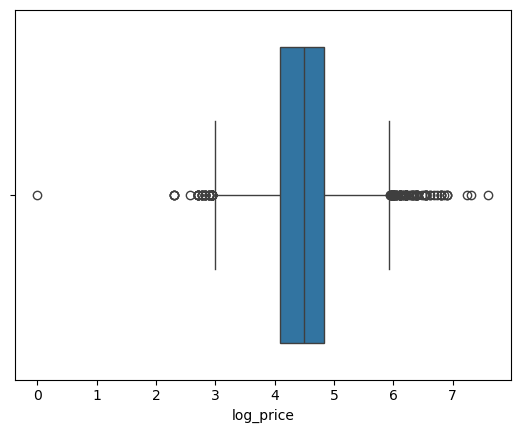

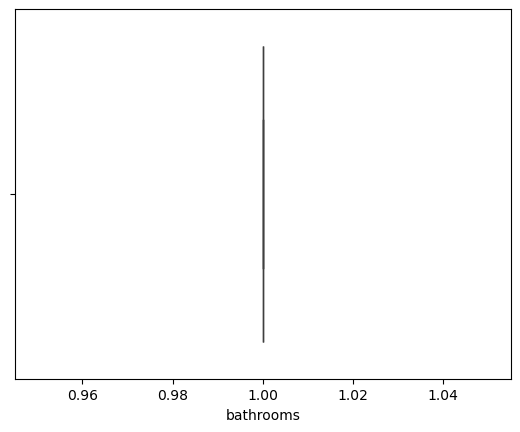

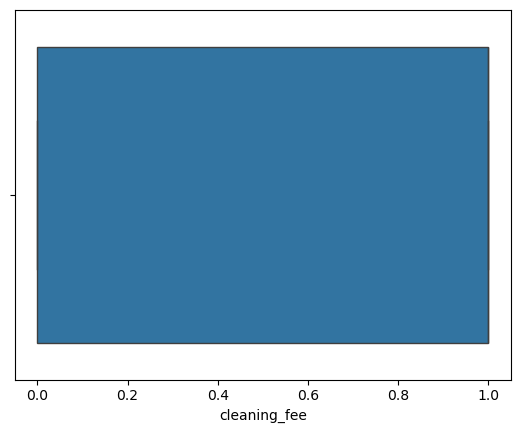

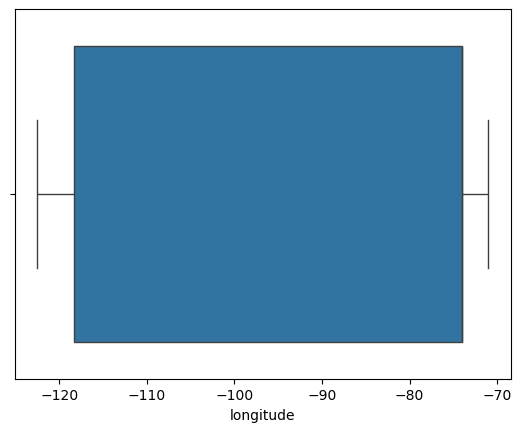

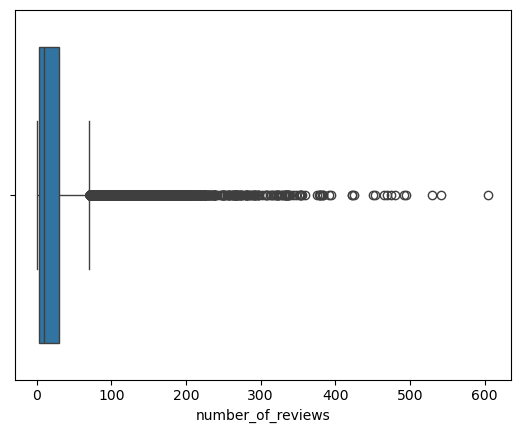

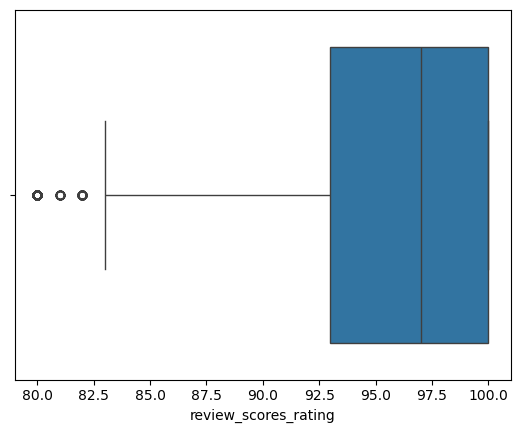

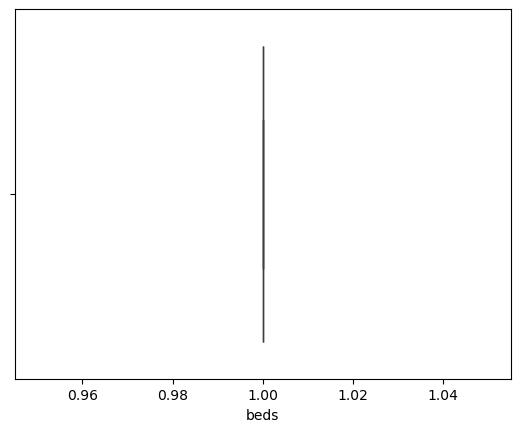

In [17]:
for i in num_col:
    sns.boxplot(x=df[i])
    plt.show()

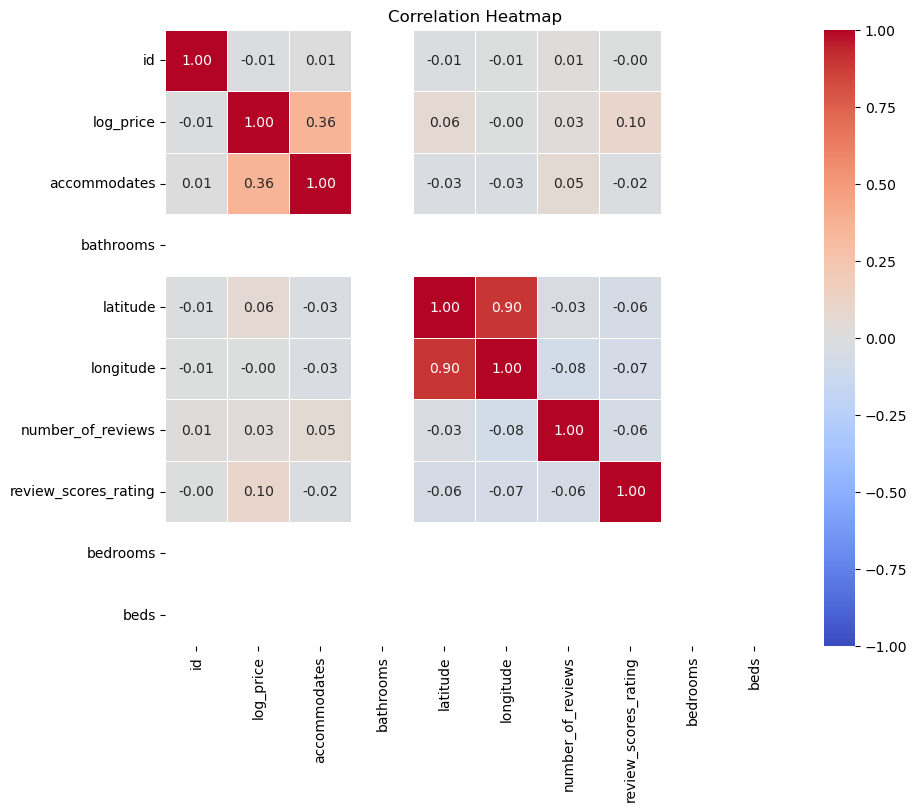

In [18]:
numeric_df = df.select_dtypes(include='number')

# 3. Compute the correlation matrix
corr = numeric_df.corr()

# 4. Plot the heatmap with custom color map for better contrast
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# 5. Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()


In [48]:
focus_cols = ['bathrooms', 'bedrooms', 'beds']
corr_focus = corr.loc[focus_cols, focus_cols]

plt.figure(figsize=(6, 4))
sns.heatmap(corr_focus, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Focused Correlation: Bathrooms, Bedrooms, Beds')
plt.show()


In [50]:
print("Correlation between bedrooms and beds:", corr['bedrooms']['beds'])
print("Correlation between bedrooms and bathrooms:", corr['bedrooms']['bathrooms'])
print("Correlation between beds and bathrooms:", corr['beds']['bathrooms'])


Correlation between bedrooms and beds: nan
Correlation between bedrooms and bathrooms: nan
Correlation between beds and bathrooms: nan


In [19]:
x=df.drop("log_price",axis =1)
y=df["log_price"]
print(x.shape)
print(y.shape)

(25345, 28)
(25345,)


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train. shape)
print(y_test.shape)

(19008, 28)
(6337, 28)
(19008,)
(6337,)


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', encoder, cat_col)
    ],
    remainder='passthrough'
)


# Transform both train and test sets
x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)
print(x_train.shape)
print(x_test.shape)




(19008, 80771)
(6337, 80771)


C:\Users\yerra\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2, 6, 7, 10, 11, 13, 14, 15, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [22]:
m1=LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [23]:
print("Training Score",m1.score(x_train,y_train))
print("Testing Score",m1.score(x_test,y_test))

Training Score 0.00013802334633505886
Testing Score 0.00037759757794997295


In [24]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = m1.predict(x_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.grid(True)
plt.show()
